In [1]:
#restart the kernel after installation
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [2]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.3.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [3]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
dataset_url = 'https://www.kaggle.com/camnugent/sandp500'

In [5]:
od.download(dataset_url)

Skipping, found downloaded files in ".\sandp500" (use force=True to force download)


In [6]:
import os

In [7]:
data_dir = './sandp500'

In [8]:
os.listdir(data_dir)

['all_stocks_5yr.csv', 'getSandP.py', 'individual_stocks_5yr', 'merge.sh']

In [9]:
train_csv = data_dir + '/all_stocks_5yr.csv'

In [10]:
!pip install pandas

In [11]:
import pandas as pd

In [12]:
raw_df = pd.read_csv(train_csv)
raw_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [14]:
raw_df.dropna(subset=['close', 'low', 'high', 'open', 'volume'], inplace=True) #dropna eliminates any value with null value

In [15]:
raw_df.info() #the null values were eliminated as the row of items decrease to 619029

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  object 
 1   open    619029 non-null  float64
 2   high    619029 non-null  float64
 3   low     619029 non-null  float64
 4   close   619029 non-null  float64
 5   volume  619029 non-null  int64  
 6   Name    619029 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 37.8+ MB


In [16]:
raw_df.describe()

,open,high,low,close,volume
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


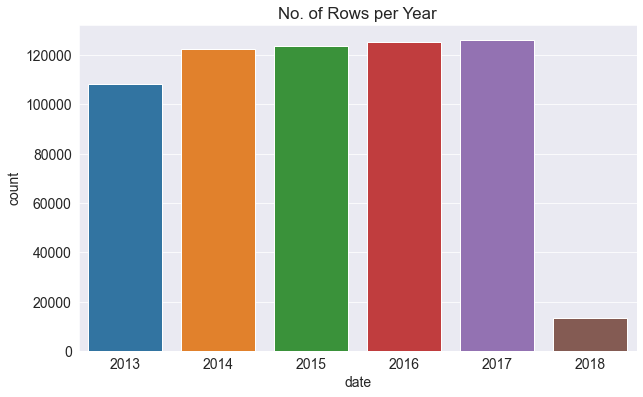

In [17]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.date).dt.year);

In [18]:
year = pd.to_datetime(raw_df.date).dt.year #separating the data into train, val and test data
train_df = raw_df[year < 2016]
val_df = raw_df[year == 2016]
test_df = raw_df[year > 2016]

In [19]:
print('train_df.shape :', train_df.shape)

train_df.shape : (354548, 7)


In [20]:
print('val_df.shape :', val_df.shape)

val_df.shape : (125320, 7)


In [21]:
print('test_df.shape :', test_df.shape)

test_df.shape : (139161, 7)


In [22]:
train_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.120,14.630,14.75,8407500,AAL
1,2013-02-11,14.89,15.010,14.260,14.46,8882000,AAL
2,2013-02-12,14.45,14.510,14.100,14.27,8126000,AAL
3,2013-02-13,14.30,14.940,14.250,14.66,10259500,AAL
4,2013-02-14,14.94,14.960,13.160,13.99,31879900,AAL
...,...,...,...,...,...,...,...
618506,2015-12-24,47.86,48.450,47.630,48.13,965268,ZTS
618507,2015-12-28,47.96,48.200,47.590,47.90,928748,ZTS
618508,2015-12-29,48.37,48.620,47.960,48.33,1483846,ZTS
618509,2015-12-30,48.33,48.645,48.005,48.26,1453861,ZTS


In [23]:
val_df

,date,open,high,low,close,volume,Name
730,2016-01-04,41.2900,41.3501,40.30,40.91,12037151,AAL
731,2016-01-05,41.1800,41.4900,39.95,40.52,10514164,AAL
732,2016-01-06,40.0500,41.7000,40.00,41.23,12393780,AAL
733,2016-01-07,40.9700,41.5200,39.68,40.45,11312876,AAL
734,2016-01-08,40.9400,41.3600,40.26,40.37,8853096,AAL
...,...,...,...,...,...,...,...
618758,2016-12-23,53.2000,53.7800,53.18,53.78,1942469,ZTS
618759,2016-12-27,53.7800,54.1500,53.65,53.72,1344976,ZTS
618760,2016-12-28,53.7600,53.8500,53.35,53.44,1241854,ZTS
618761,2016-12-29,53.4747,53.7790,53.40,53.62,1047017,ZTS


In [24]:
test_df

,date,open,high,low,close,volume,Name
982,2017-01-03,47.28,47.340,46.135,46.30,6737752,AAL
983,2017-01-04,46.63,47.435,46.350,46.70,5859604,AAL
984,2017-01-05,46.52,46.930,45.610,45.89,6825316,AAL
985,2017-01-06,45.85,46.720,45.470,46.21,7260197,AAL
986,2017-01-09,46.01,47.340,45.780,47.08,4739142,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.270,76.690,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.120,76.730,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.920,73.180,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.560,72.130,73.27,4924323,ZTS


In [25]:
input_cols = ['open', 'high', 'low', 'volume'] #for now will keep date as a column but will remove it later
target_col = ['close']

In [26]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [27]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [28]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [29]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [30]:
print(numeric_cols)

['open', 'high', 'low', 'volume']


In [31]:
print(categorical_cols)

[]


In [32]:
from sklearn.impute import SimpleImputer

In [33]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [34]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [35]:
test_inputs[numeric_cols].isna().sum()

open      0
high      0
low       0
volume    0
dtype: int64

In [36]:
train_inputs[numeric_cols].isna().sum()

open      0
high      0
low       0
volume    0
dtype: int64

In [37]:
val_inputs[numeric_cols].isna().sum()

open      0
high      0
low       0
volume    0
dtype: int64

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [40]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [41]:
val_inputs.describe().loc[['min', 'max']]

,open,high,low,volume
min,0.000020,0.000058,0.000000,0.000109
max,0.774988,0.773963,0.761424,0.606706


In [42]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [43]:
X_test

,open,high,low,volume
982,0.022356,0.022093,0.021949,0.010898
983,0.022038,0.022139,0.022054,0.009478
984,0.021984,0.021894,0.021690,0.011040
985,0.021656,0.021793,0.021622,0.011743
986,0.021734,0.022093,0.021774,0.007665
...,...,...,...,...
619035,0.036830,0.037061,0.036974,0.004824
619036,0.037167,0.036989,0.036993,0.004198
619037,0.036732,0.036408,0.035248,0.004791
619038,0.034822,0.035266,0.034731,0.007965


In [44]:
from sklearn.tree import DecisionTreeRegressor #import DecisionTreeClassifer will allow to decide either No or Yes similar logistic Regression

In [45]:
model = DecisionTreeRegressor(random_state=42)

In [46]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 1.94 s
Wall time: 1.94 s


DecisionTreeRegressor(random_state=42)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
train_preds = model.predict(X_train)

In [49]:
train_preds

array([14.75, 14.46, 14.27, ..., 48.33, 48.26, 47.92])

In [50]:
pd.value_counts(train_preds)

35.4000     71
47.0000     71
59.0000     71
57.0000     70
33.9300     68
            ..
130.5450     1
77.1481      1
109.1050     1
77.6371      1
29.3180      1
Length: 40534, dtype: int64

In [51]:
model.score(X_val, val_targets)

0.9997634633469797

In [52]:
from sklearn.tree import plot_tree, export_text

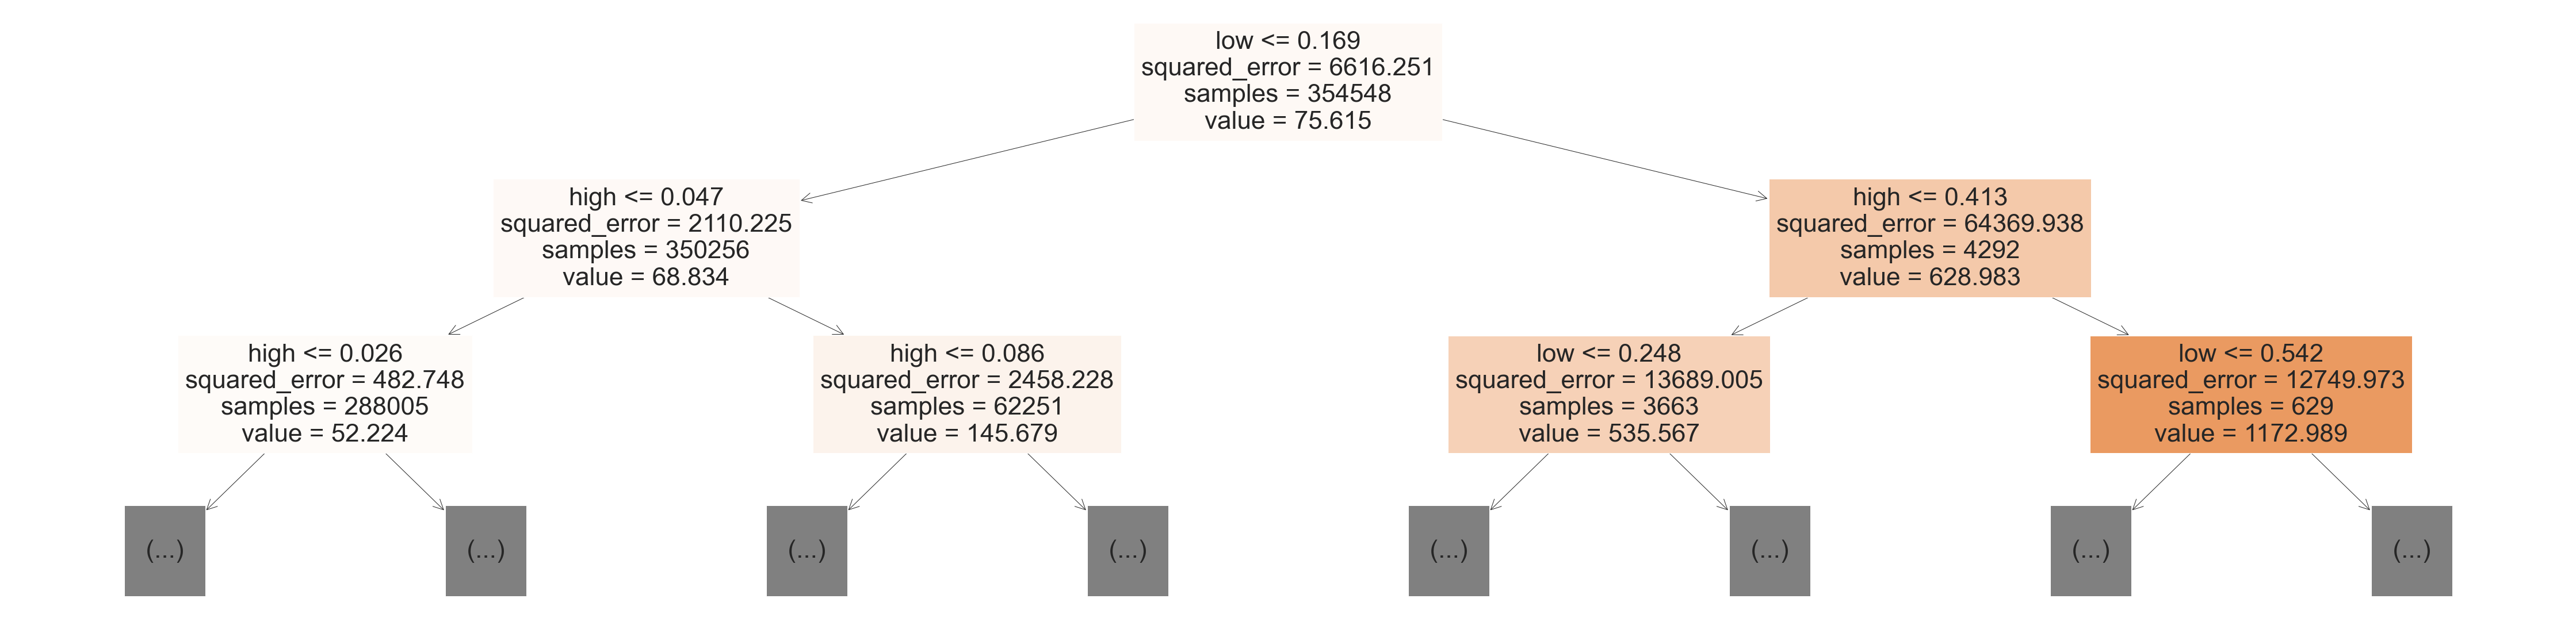

In [53]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [54]:
model.tree_.max_depth

41

In [55]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- low <= 0.17
|   |--- high <= 0.05
|   |   |--- high <= 0.03
|   |   |   |--- high <= 0.02
|   |   |   |   |--- low <= 0.01
|   |   |   |   |   |--- low <= 0.01
|   |   |   |   |   |   |--- high <= 0.00
|   |   |   |   |   |   |   |--- low <= 0.00
|   |   |   |   |   |   |   |   |--- high <= 0.00
|   |   |   |   |   |   |   |   |   |--- high <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- high <= 0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- high >  0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |--- high >  0.00
|   |   |   |   |   |   |   |   |   |   |--- low <= 0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- low >  0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |--- high >  0.00

In [56]:
model.feature_importances_

array([3.25114239e-05, 4.00566109e-01, 5.99388868e-01, 1.25110238e-05])

In [57]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [58]:
importance_df.head(10)

,feature,importance
2,low,0.599389
1,high,0.400566
0,open,0.000033
3,volume,0.000013


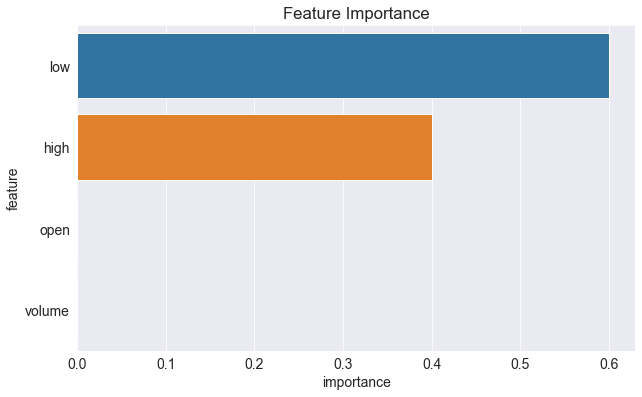

In [59]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');